In [1]:
import modneat
import os
import glob
import cv2
from PIL import Image
from IPython.display import Image
from PIL import Image as pImage
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 99999;

<IPython.core.display.Javascript object>

In [3]:
import subprocess
def res_cmd(cmd):
  return subprocess.Popen(
      cmd, stdout=subprocess.PIPE,
      shell=True).communicate()[0]

In [4]:
def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    h_min = min(im.shape[0] for im in im_list)
    im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                      for im in im_list]
    return cv2.hconcat(im_list_resize)

def visualize(target_dir):
    """
    ディレクトリ内の複数試行の結果を可視化する。
    
    引数: target_dir(str), 可視化したいディレクトリが複数(試行回数分)入っているディレクトリの絶対パス
    """
    results_dirs = glob.glob(target_dir + '/*')
    
    best_fitness_list = []
    average_fitness_list = []
    
    for results_dir in results_dirs:
        avg_fitness_png = glob.glob(results_dir + '/avg_fitness.png')[0]
        graph_png = glob.glob(results_dir + '/Digraph.gv.png')[0]
        result = glob.glob(results_dir + '/results.txt')[0]
        
        img = pImage.open(avg_fitness_png,"r")
        fig=plt.figure()
        plt.imshow(img)
        display(fig)
        
        img = pImage.open(graph_png,"r")
        fig = plt.figure()
        plt.imshow(img)
        display(fig)
        print(avg_fitness_png)
        
        res = res_cmd("cat " + result + " | grep 'Best fitness' | tail -1 ").decode('utf-8')
        best_fitness = float(res.split()[2])
        
        res = res_cmd("cat " + result + " | grep 'average fitness' | tail -1 ").decode('utf-8')
        average_fitness = float(res.split()[3])
        
        print('Best fitness: ', best_fitness)
        best_fitness_list.append(best_fitness)
        
        print('Average fitness: ', average_fitness)
        average_fitness_list.append(average_fitness)
    
    print('#')
    print('#===============================================')
    print('#')
    print('average of best fitness: ', sum(best_fitness_list) / len(best_fitness_list))
    print('best of best fitness: ' ,max(best_fitness_list))
    print('average of average fitness: ', sum(average_fitness_list) / len(average_fitness_list))
    print('best of average fitness:', max(average_fitness_list))

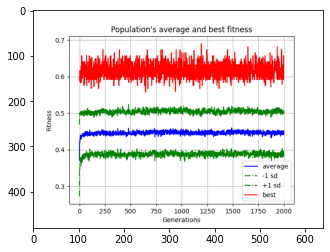

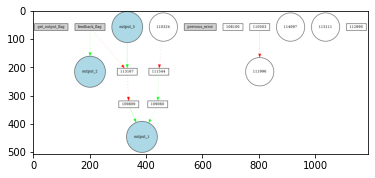

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_2/avg_fitness.png
Best fitness:  0.61624
Average fitness:  0.45119


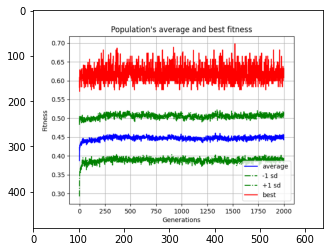

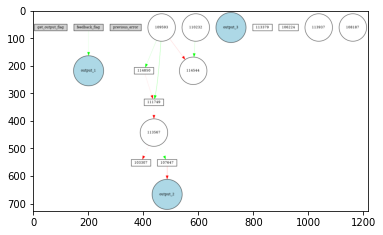

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_5/avg_fitness.png
Best fitness:  0.60808
Average fitness:  0.45549


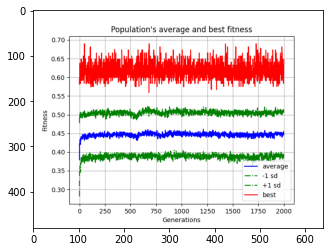

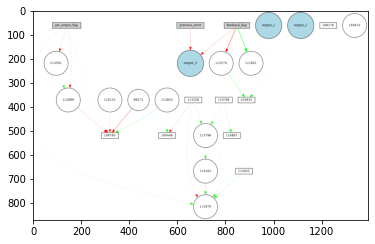

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_6/avg_fitness.png
Best fitness:  0.64792
Average fitness:  0.44864


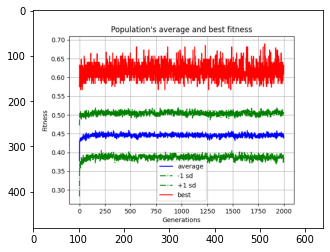

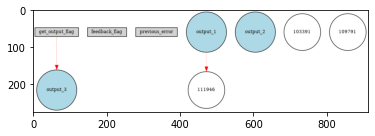

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_4/avg_fitness.png
Best fitness:  0.63257
Average fitness:  0.44013


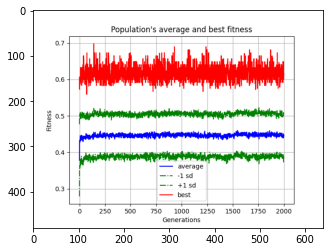

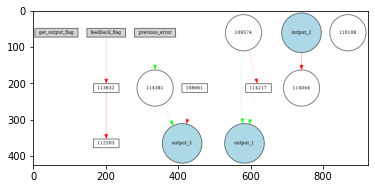

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_9/avg_fitness.png
Best fitness:  0.6152
Average fitness:  0.44637


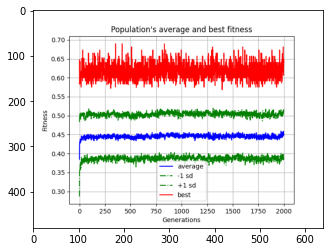

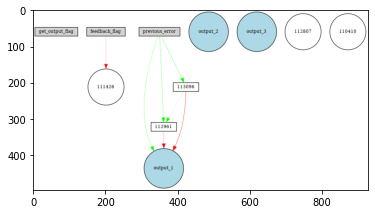

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_8/avg_fitness.png
Best fitness:  0.64061
Average fitness:  0.44844


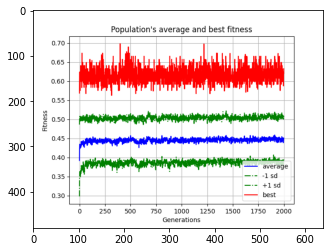

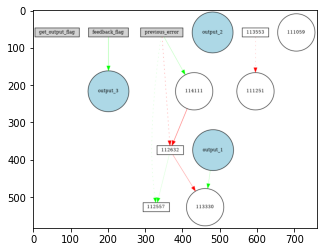

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_3/avg_fitness.png
Best fitness:  0.63258
Average fitness:  0.45084


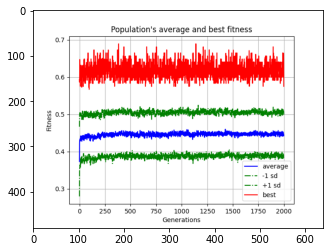

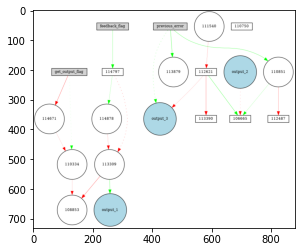

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_1/avg_fitness.png
Best fitness:  0.57542
Average fitness:  0.44256


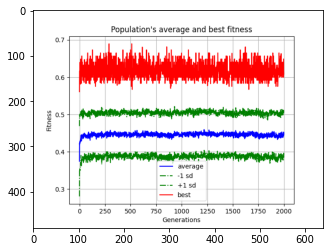

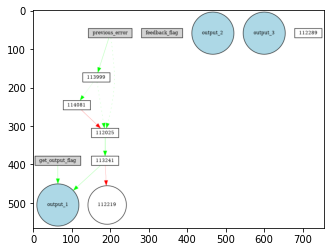

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_10/avg_fitness.png
Best fitness:  0.60808
Average fitness:  0.44648


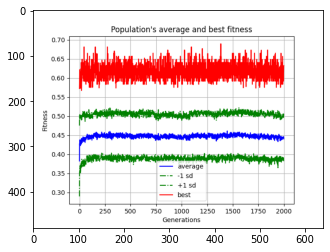

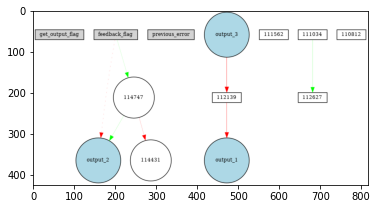

/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN/task.three_rules_random_ModIndExHebbFFN_7/avg_fitness.png
Best fitness:  0.63247
Average fitness:  0.44039
#
#===============================================
#
average of best fitness:  0.620917
best of best fitness:  0.64792
average of average fitness:  0.4470529999999999
best of average fitness: 0.45549


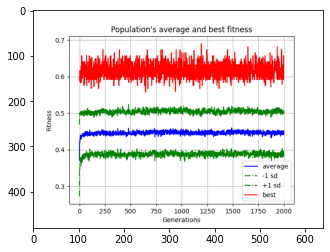

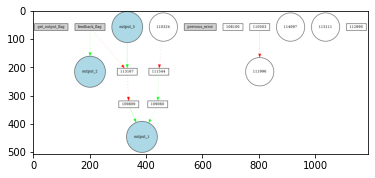

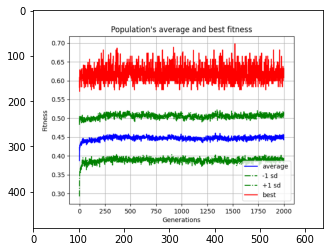

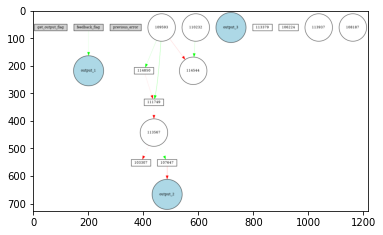

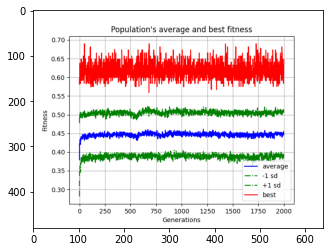

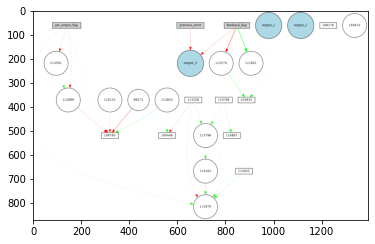

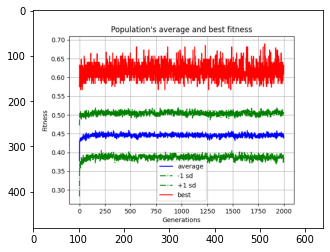

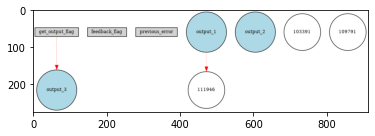

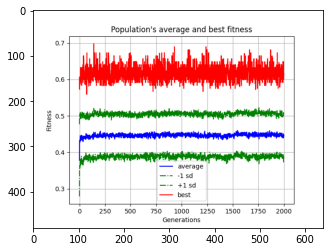

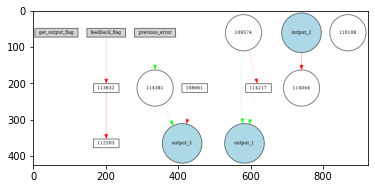

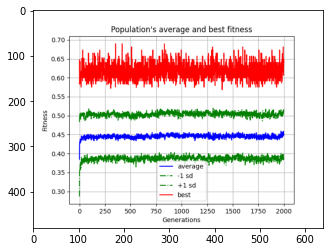

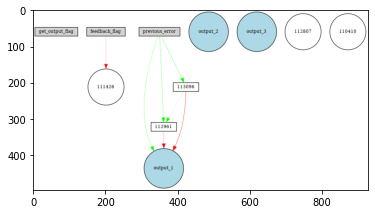

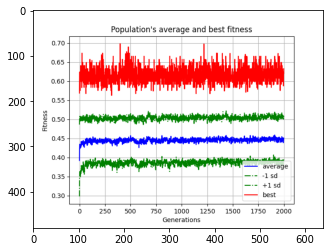

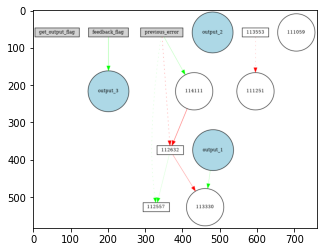

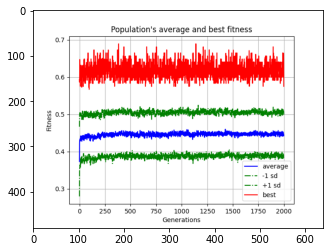

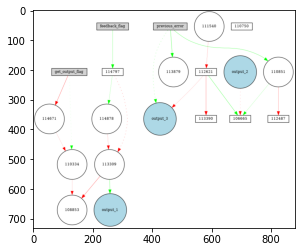

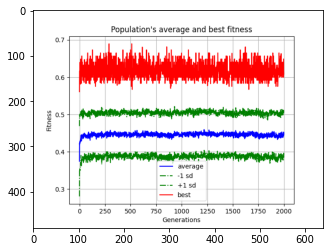

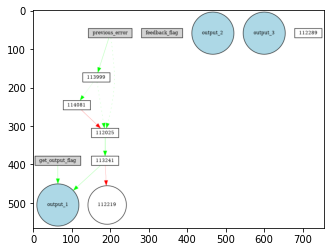

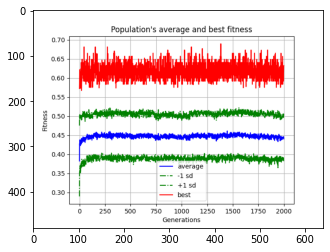

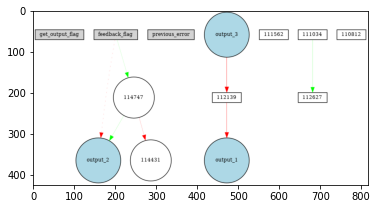

In [5]:
visualize("/data/kato-data/results01/task_three_rules_random_ModIndExHebbFFN")